# Lookup text to search on drawing

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook

In [2]:
df = pd.read_excel('text_location.xlsx',index_col=[0])

In [3]:
# https://mkyong.com/python/python-how-to-delete-a-file-or-folder/
# You should change 'test' to your preferred folder.
import shutil
MYDIR = (".\\images")
def makedir(MYDIR):
    CHECK_FOLDER = os.path.isdir(MYDIR)

    # If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(MYDIR)
        print("created folder : ", MYDIR)

    else:
        shutil.rmtree(MYDIR)
        print(MYDIR, "folder already exists and re-created")
        os.mkdir(MYDIR)

In [4]:
# https://stackoverflow.com/a/43185606
# https://diewland.medium.com/python-cv2-%E0%B9%83%E0%B8%99-windows-%E0%B8%AD%E0%B9%88%E0%B8%B2%E0%B8%99%E0%B9%84%E0%B8%9F%E0%B8%A5%E0%B9%8C%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%84%E0%B8%A1%E0%B9%88%E0%B9%84%E0%B8%94%E0%B9%89-f688a4747070
import numpy as np
import cv2
def cv2_imread_win(img_filepath, np):
    with open(img_filepath, "rb") as stream:
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        return cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)

In [5]:
# lookup = '15E020'
# lookup = '15C001'
# lookup = '15C00'
lookup = '15P003'

def find_text(lookup):
    return df[df.text.str.contains(lookup,na=False)]

In [6]:
lookup_df = find_text(lookup=lookup)
# lookup_df['id'] = lookup_df['id'].astype(int)
lookup_df = lookup_df.astype({'id':'int','x1':'int','x2':'int','y1':'int','y2':'int'})
lookup_df

,file_name,id,text,x1,y1,x2,y2
57,62-S-1-00-103-3-1_page1.jpg,58,15P003B,2653,2671,2800,2698
58,62-S-1-00-103-3-1_page1.jpg,59,15P0035A,2890,2670,3041,2698
14,69-P-1-15-001-3-19_page1.jpg,15,15P003,4392,464,4482,484
119,69-P-1-15-017-3-15_page1.jpg,120,15P003A/8,4996,2479,5137,2507
180,69-P-1-15-017-3-15_page1.jpg,181,15P003A/B,1931,3605,2140,3638
181,69-P-1-15-017-3-15_page1.jpg,182,15P0038,3673,3577,3834,3606
182,69-P-1-15-017-3-15_page1.jpg,183,15P003C,4309,3575,4471,3604
183,69-P-1-15-017-3-15_page1.jpg,184,15P0038,3048,3580,3208,3609
44,69-P-1-15-036-3-7_page1.jpg,45,15P003A/B/C,2038,563,2075,808
29,69-P-1-15-037-3-7_page1.jpg,30,15P003A/B/C,1548,323,1586,569


In [7]:
lookup_file_name = lookup_df.groupby('file_name',as_index=False).agg(qty=('id', 'count'))
print(lookup_file_name)
lookup_file_name = lookup_file_name.file_name

                      file_name  qty
0   62-S-1-00-103-3-1_page1.jpg    2
1  69-P-1-15-001-3-19_page1.jpg    1
2  69-P-1-15-017-3-15_page1.jpg    5
3   69-P-1-15-036-3-7_page1.jpg    1
4   69-P-1-15-037-3-7_page1.jpg    1
5   69-P-1-15-038-3-6_page1.jpg    2


./find/ folder already exists and re-created


  0%|          | 0/5 [00:00<?, ?it/s]

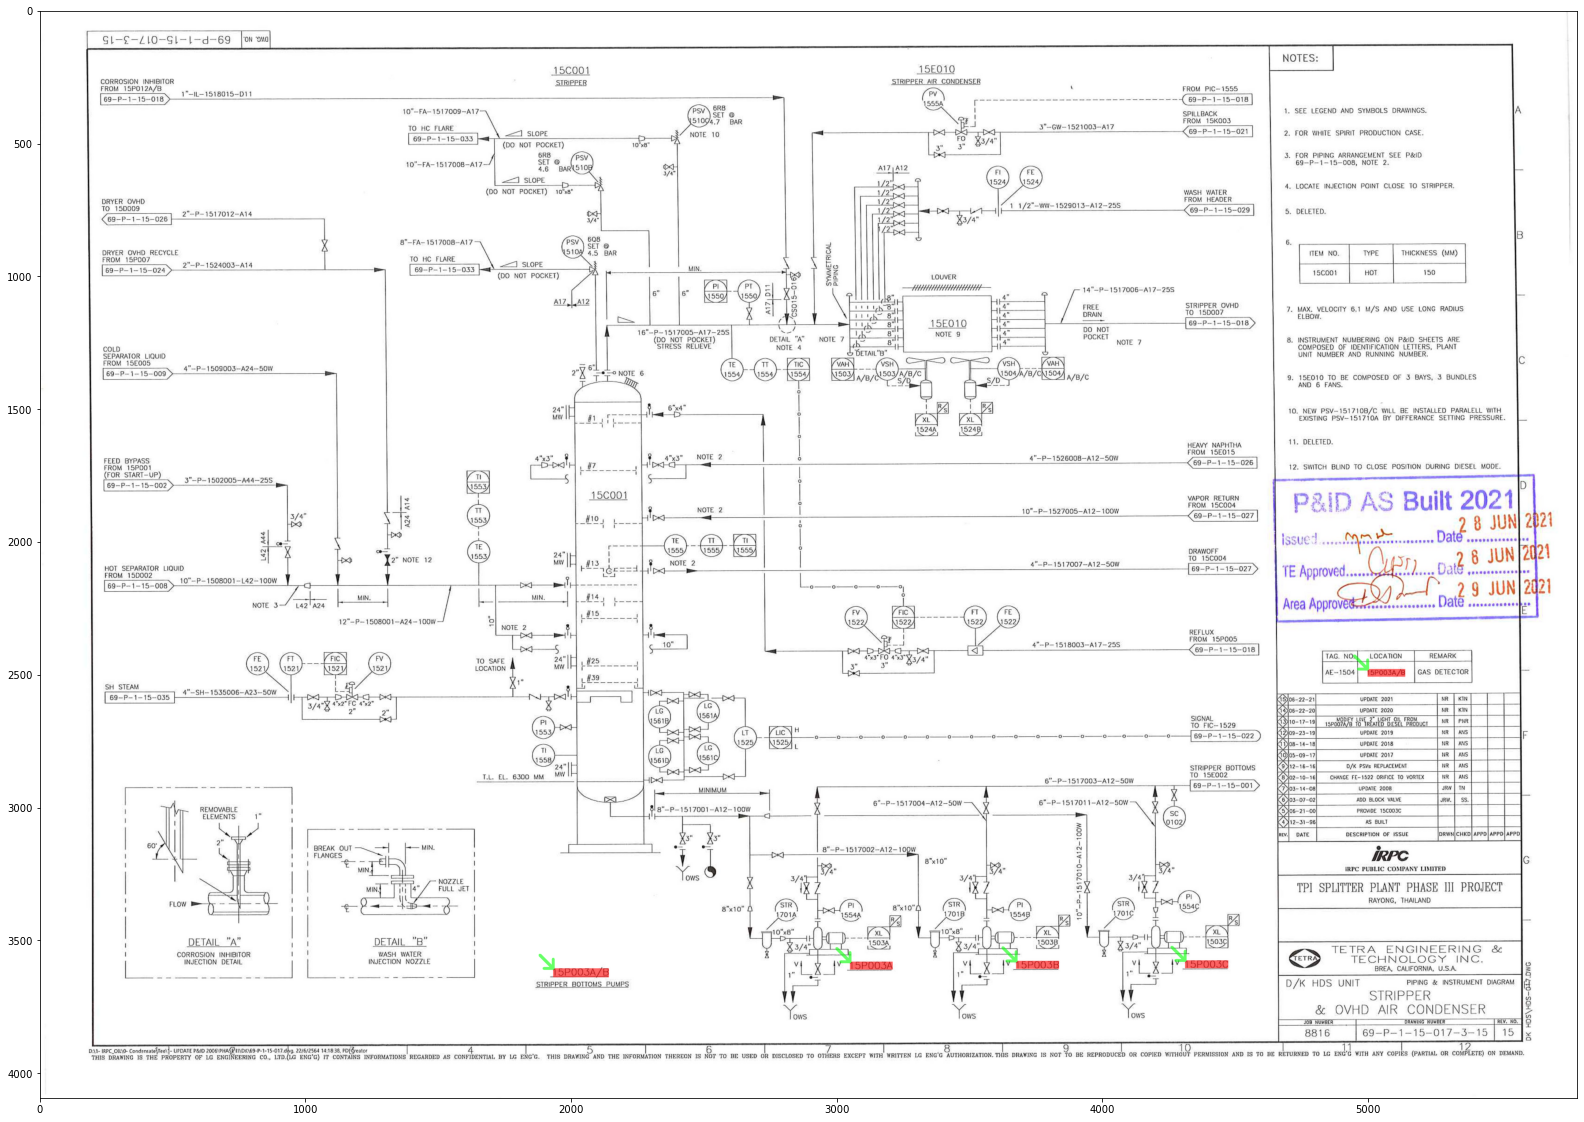

In [8]:
pic = 2
a = lookup_df[lookup_df.file_name==lookup_file_name[pic]].values
read_folder = r'./images/'
save_folder = r'./find/'
makedir(save_folder)
file = lookup_file_name[pic]
image = read_folder+lookup_file_name[pic]
img0 = cv2_imread_win(image,np)
img = img0.copy()
# plt.figure(figsize=(30,20))
for fn,id,text,x1,y1,x2,y2 in tqdm_notebook(a):
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), -1)

    img = cv2.arrowedLine(img, (x1-50,y1-50), (x1,y1),
                                         color=(0, 255, 0), thickness=9, tipLength = 0.5)
alpha = 0.6  # Transparency factor.
# Following line overlays transparent rectangle over the image
img = cv2.addWeighted(img, alpha, img0, 1 - alpha, 0)
# print((x1, y1), (x2, y2))
plt.figure(figsize=(30,20))
plt.imshow(img)    
# plt.show();
plt.imsave(save_folder+file,img)